# 🧩 Reto 4 – Integración de resultados
**Objetivo:** combinar resultados parciales en un diagnóstico integral por sitio.

### Pasos
1. Carga `resultado_temperatura.csv`, `resultado_ph.csv`, `resultado_oxigeno.csv`.
2. Únelos por `sitio` usando `merge`.
3. Crea `diagnostico_final` con reglas (parcial/total/normal).
4. Exporta `diagnostico_final.csv`.
5. Cuenta categorías con `value_counts()`.

> **Reto adicional:** gráfico de barras de distribución.

In [93]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
# Cargar los tres archivos CSV en pandas
temp = pd.read_csv("resultado_temperatura.csv")
ph = pd.read_csv("resultado_oxigeno.csv")
oxigeno = pd.read_csv("resultado_oxigeno.csv")
print("se importaron los resultados")
pd

se importaron los resultados


<module 'pandas' from '/home/codespace/.local/lib/python3.12/site-packages/pandas/__init__.py'>

In [94]:
#  Unir los tres archivos en  'sitio'
temp_ph = pd.merge(temp, ph, on='sitio')
df = pd.merge(temp_ph, oxigeno, on='sitio')

print("Datos combinados:")
df


Datos combinados:


,sitio,temperatura,categoria_temp,riesgo_termico,Unnamed: 0_x,oxigeno_x,nivel_oxigeno_x,riesgo_biologico_x,Unnamed: 0_y,oxigeno_y,nivel_oxigeno_y,riesgo_biologico_y
0,Río Villeta,28.3,Alta,Alto,4,6.1,medio,sin alerta,4,6.1,medio,sin alerta
1,Quebrada Cune (San Francisco),25.2,Alta,Alto,5,4.5,bajo,alerta,5,4.5,bajo,alerta
2,Río Tobia (Nocaima),26.9,Alta,Alto,6,5.2,medio,sin alerta,6,5.2,medio,sin alerta
3,Río Bahamón (Sasaima),27.6,Alta,Alto,8,6.7,medio,sin alerta,8,6.7,medio,sin alerta
4,Río Guayuriba (La Mesa),30.5,Alta,Alto,9,4.8,bajo,alerta,9,4.8,bajo,alerta


In [95]:
def diagnosticar(fila):
    # Verifica si existen las columnas antes de acceder
    if 'riesgo_biologico' in fila and fila['riesgo_biologico'] == 'alerta':
        return 'riesgo total'
    elif ('nivel_ph' in fila and fila['nivel_ph'] == 'medio') or \
         ('nivel_oxigeno' in fila and fila['nivel_oxigeno'] == 'medio'):
        return 'riesgo parcial'
    else:
        return 'sin alerta'

df['diagnostico_final'] = df.apply(diagnosticar, axis=1)
df

,sitio,temperatura,categoria_temp,riesgo_termico,Unnamed: 0_x,oxigeno_x,nivel_oxigeno_x,riesgo_biologico_x,Unnamed: 0_y,oxigeno_y,nivel_oxigeno_y,riesgo_biologico_y,diagnostico_final
0,Río Villeta,28.3,Alta,Alto,4,6.1,medio,sin alerta,4,6.1,medio,sin alerta,sin alerta
1,Quebrada Cune (San Francisco),25.2,Alta,Alto,5,4.5,bajo,alerta,5,4.5,bajo,alerta,sin alerta
2,Río Tobia (Nocaima),26.9,Alta,Alto,6,5.2,medio,sin alerta,6,5.2,medio,sin alerta,sin alerta
3,Río Bahamón (Sasaima),27.6,Alta,Alto,8,6.7,medio,sin alerta,8,6.7,medio,sin alerta,sin alerta
4,Río Guayuriba (La Mesa),30.5,Alta,Alto,9,4.8,bajo,alerta,9,4.8,bajo,alerta,sin alerta


In [96]:
#  Exportar los resultados 
df.to_csv('diagnostico_final.csv', index=False)
print("Archivo 'diagnostico_final.csv' fue exportado.")


Archivo 'diagnostico_final.csv' fue exportado.


In [97]:
import pandas as pd

df = pd.DataFrame({'diagnostico_final': ['riesgo total', 'normal', 'riesgo parcial', 'normal', 'riesgo total']})

# Contar  diagnóstico
conteo = df['diagnostico_final'].value_counts()

print(conteo)


diagnostico_final
riesgo total      2
normal            2
riesgo parcial    1
Name: count, dtype: int64


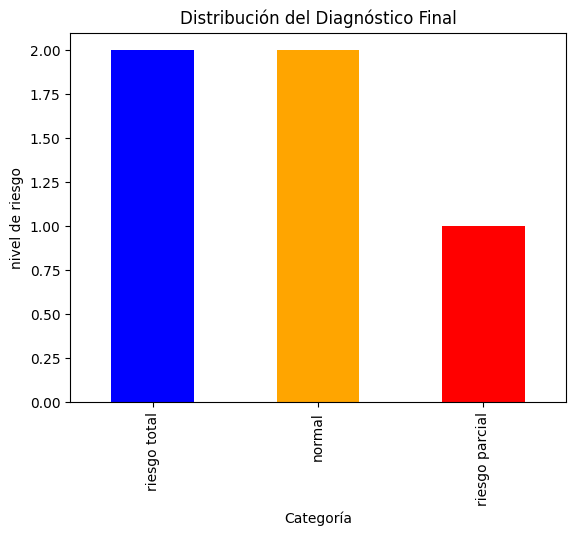

In [98]:
#  gráficas de barras con matplotlib
conteo.plot(kind='bar', color=['blue', 'orange', 'red'])
plt.title('Distribución del Diagnóstico Final')
plt.xlabel('Categoría')
plt.ylabel('nivel de riesgo')
plt.show()